Exploratory Data Analysis For Google Ads Dataset

In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv('GoogleAds_DataAnalytics_Sales_Cleaned.csv')

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

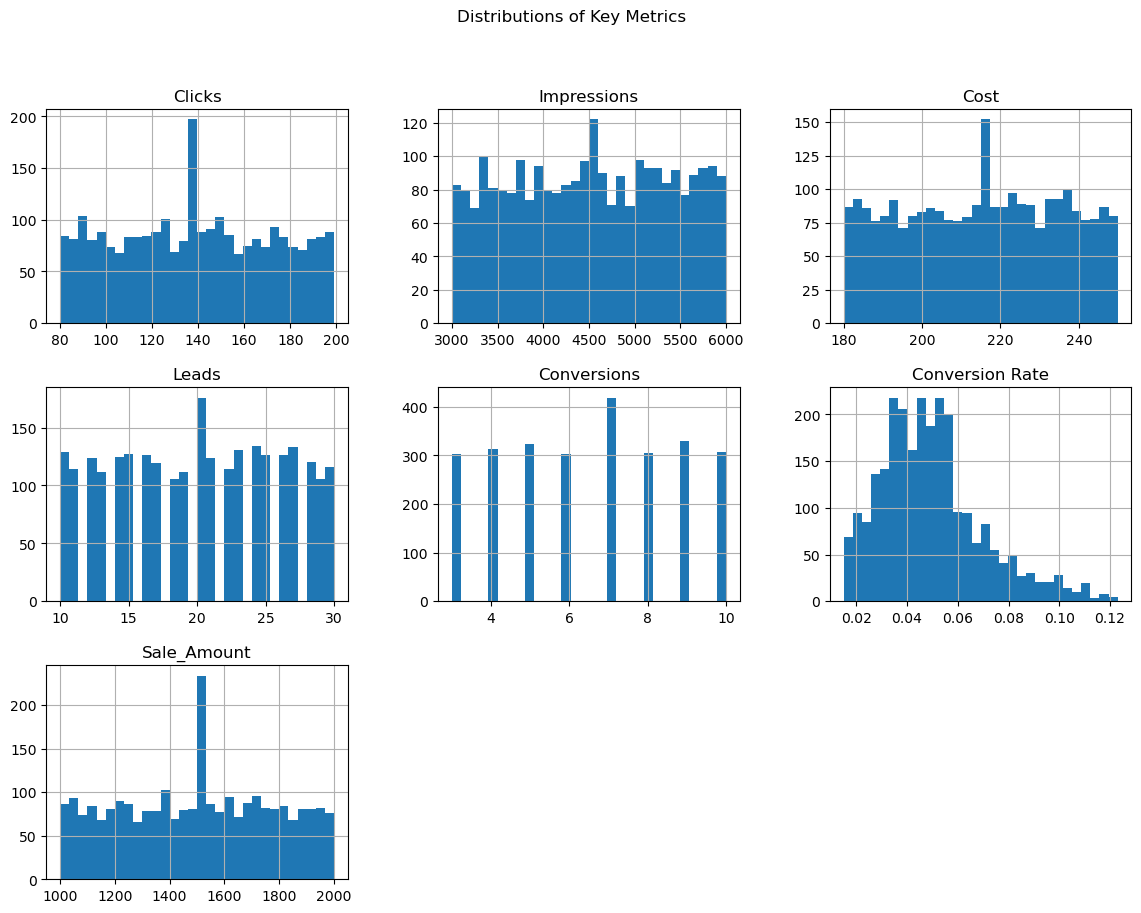

In [22]:
# Distributions of numerical features
num_cols = ['Clicks', 'Impressions', 'Cost', 'Leads', 'Conversions', 'Conversion Rate', 'Sale_Amount']
df[num_cols].hist(bins=30, figsize=(14, 10))
plt.suptitle('Distributions of Key Metrics')
plt.show()

All of the plot doesn't show any particular distribution but are approximatel symmetrical except for conversion rate which is right skewed

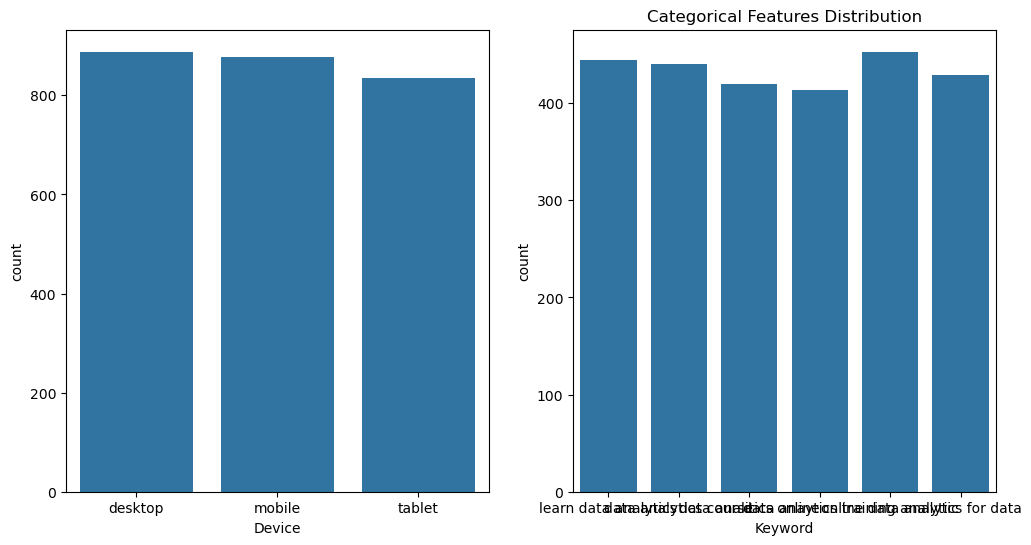

In [31]:
cat_cols=['Device','Keyword']
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(df[cat_cols], x='Device')
plt.subplot(1, 2, 2)
sns.countplot(df[cat_cols], x='Keyword')
plt.title('Categorical Features Distribution')
plt.show()


There are approximately equal observations of each categor for both variables.

]

In [35]:
# Is there a relation between the device type and other variables like clicks, impressions, cost, leads, conversions, conversion rate, and sale amount?

# SInce the variables are not normal so we dont assume normality and equal variances hence we use Kruskal Wallis test
from scipy.stats import kruskal

groups = [group['Clicks'].values for name, group in df.groupby('Device')]

stat,pvalue= kruskal(*groups)
print("H-statistic:", stat)
print("p-value:", pvalue)

if pvalue < 0.05:
    print("Significant difference in clicks between devices.")
else:
    print("No significant difference in clicks between devices.")

H-statistic: 3.7771330200985047
p-value: 0.15128852404860793
No significant difference in clicks between devices.


Hence Clicks doesn't depend on the device type.Now we check other variables with respect to Device.

In [36]:
def check_device_relation(variable):
    groups = [group[variable].values for name, group in df.groupby('Device')]
    stat, pvalue = kruskal(*groups)
    print(f"H-statistic for {variable}:", stat)
    print(f"p-value for {variable}:", pvalue)
    
    if pvalue < 0.05:
        print(f"Significant difference in {variable} between devices.")
    else:
        print(f"No significant difference in {variable} between devices.")

In [40]:
variables=['Clicks', 'Impressions', 'Cost', 'Leads','Conversions', 'Conversion Rate', 'Sale_Amount']
for i in variables:
    check_device_relation(i)
    print('------------------------')

H-statistic for Clicks: 3.7771330200985047
p-value for Clicks: 0.15128852404860793
No significant difference in Clicks between devices.
------------------------
H-statistic for Impressions: 0.3898118035270164
p-value for Impressions: 0.8229120889892658
No significant difference in Impressions between devices.
------------------------
H-statistic for Cost: 4.089350791531307
p-value for Cost: 0.12942219415187592
No significant difference in Cost between devices.
------------------------
H-statistic for Leads: 0.42071308899171095
p-value for Leads: 0.8102952881350832
No significant difference in Leads between devices.
------------------------
H-statistic for Conversions: 3.082465136880038
p-value for Conversions: 0.21411702482689668
No significant difference in Conversions between devices.
------------------------
H-statistic for Conversion Rate: 1.5793437564744215
p-value for Conversion Rate: 0.4539937360706373
No significant difference in Conversion Rate between devices.
---------------

None of the variables are dependent on Device type.

Now we move forward to create a new data frame to calculate key performance index for further analysis